Deep Learning Assignment 3 

References:
Code source 1: https://medium.com/swlh/stock-price-prediction-with-pytorch-37f52ae84632

Code source 2 (TODO: find how to get predictions accuracy): https://www.kaggle.com/code/taronzakaryan/predicting-stock-price-using-lstm-model-pytorch


In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
import time
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import torch
import torch.nn as nn
import os
import yfinance as yf
import os, contextlib
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import datetime as dt

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

# folder_path = '/content/drive/MyDrive/deep_learning/'
# print(os.listdir(folder_path))

# hist_dir = folder_path + 'hist'

# if not os.path.exists(hist_dir):
#     print('dir not exists so creating one')
#     os.mkdir(hist_dir)
# else:
#     print('directory exists ', hist_dir)


In [3]:
# configs
offset = 0
limit = 3000
period = 'max' # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max

# download all NASDAQ traded symbols

# data = pd.read_csv("http://www.nasdaqtrader.com/dynamic/SymDir/nasdaqtraded.txt", sep='|')
# data_clean = data[data['Test Issue'] == 'N']
# symbols = data_clean['NASDAQ Symbol'].tolist()
# print('total number of symbols traded = {}'.format(len(symbols)))



In [4]:
symbols = ['AAPL','AMZN','META']

In [5]:
print(symbols)

['AAPL', 'AMZN', 'META']


In [6]:
limit = limit if limit else len(symbols)
end = min(offset + limit, len(symbols))
is_valid = [False] * len(symbols)
# force silencing of verbose API
with open(os.devnull, 'w') as devnull:
    with contextlib.redirect_stdout(devnull):
        for i in range(offset, end):
            s = symbols[i]
            data = yf.download(s, period=period)
            if len(data.index) == 0:
                continue
        
            is_valid[i] = True
            file_name = s + ".csv"
            # download_path = os.path.join(root_dir,file_name)
            data.to_csv(file_name)

print('Total number of valid symbols downloaded = {}'.format(sum(is_valid)))

Total number of valid symbols downloaded = 3


In [8]:
# valid_data = data_clean[is_valid]
# valid_data.to_csv('symbols_valid_meta.csv', index=False)



In [9]:
# !mkdir stocks
# !mkdir etfs

In [10]:
# etfs = valid_data[valid_data['ETF'] == 'Y']['NASDAQ Symbol'].tolist()
# stocks = valid_data[valid_data['ETF'] == 'N']['NASDAQ Symbol'].tolist()

In [11]:
# import shutil
# from os.path import isfile, join

# def move_symbols(symbols, dest):
#     for s in symbols:
#         filename = '{}.csv'.format(s)
#         shutil.move(join('hist', filename), join(dest, filename))
        
# move_symbols(etfs, "etfs")
# move_symbols(stocks, "stocks")

In [7]:

data = pd.read_csv('AMZN.csv', index_col='Date')
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000
...,...,...,...,...,...,...
2022-11-07,91.949997,92.099998,89.040001,90.529999,90.529999,77495700
2022-11-08,90.790001,91.720001,88.230003,89.980003,89.980003,88703400
2022-11-09,89.470001,89.480003,85.870003,86.139999,86.139999,90796200


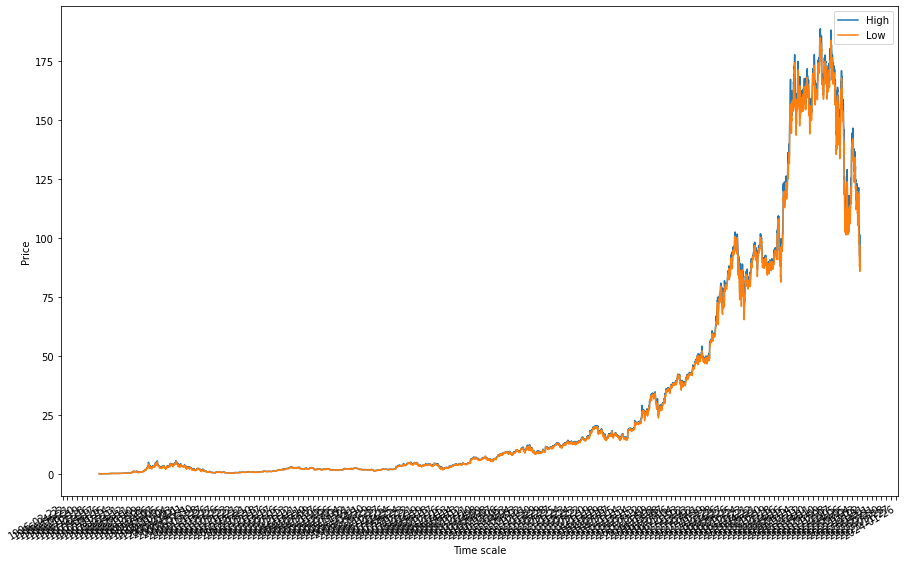

In [23]:
plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=60))
x_dates = [dt.datetime.strptime(d, '%Y-%m-%d').date() for d in data.index.values]

plt.plot(x_dates, data['High'], label='High')
plt.plot(x_dates, data['Low'], label='Low')
plt.xlabel('Time scale')
plt.ylabel('Price')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

In [24]:
# X_features = data[['Open','High','Low']]
# X_features

In [25]:
# y_labels = data[['Close']]
# y_labels

In [11]:
# # feature scaling
# standard_scaler = StandardScaler()
# x_scaled = standard_scaler.fit_transform(X_features)
# x_df = pd.DataFrame(columns=X_features.columns, data = x_scaled, index = X_features.index)
# x_df

,Open,High,Low
Date,,,
1997-05-15,-0.638478,-0.638625,-0.638924
1997-05-16,-0.638968,-0.639164,-0.639156
1997-05-19,-0.639186,-0.639379,-0.639244
1997-05-20,-0.639218,-0.639401,-0.639233
1997-05-21,-0.639316,-0.639508,-0.639509
...,...,...,...
2022-11-07,1.282136,1.263027,1.245829
2022-11-08,1.257875,1.255170,1.228665
2022-11-09,1.230267,1.208857,1.178655


In [35]:
price = data[['Close']]
price

,Close
Date,
1997-05-15,0.097917
1997-05-16,0.086458
1997-05-19,0.085417
1997-05-20,0.081771
1997-05-21,0.071354
...,...
2022-11-07,90.529999
2022-11-08,89.980003
2022-11-09,86.139999


In [36]:
scaler = MinMaxScaler(feature_range=(-1, 1))
price['Close'] = scaler.fit_transform(price['Close'].values.reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [37]:
price

,Close
Date,
1997-05-15,-0.999698
1997-05-16,-0.999821
1997-05-19,-0.999832
1997-05-20,-0.999872
1997-05-21,-0.999983
...,...
2022-11-07,-0.029921
2022-11-08,-0.035819
2022-11-09,-0.076999


In [38]:

def split_data(stock, lookback):
    data_raw = stock.to_numpy() # convert to numpy array
    data = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - lookback): 
        data.append(data_raw[index: index + lookback])
    
    data = np.array(data);
    test_set_size = int(np.round(0.2*data.shape[0]));
    train_set_size = data.shape[0] - (test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_test = data[train_set_size:,:-1]
    y_test = data[train_set_size:,-1,:]
    
    return [x_train, y_train, x_test, y_test]

lookback = 20 # choose sequence length
x_train, y_train, x_test, y_test = split_data(price, lookback)

In [12]:
# def split_data_into_steps(data_to_split, steps):
#     X = []
#     y = []
#     for i in range(len(data_to_split) - steps + 1):
#         X.append(data_to_split[i:i + steps, :-1])
#         y.append(data_to_split[i + steps - 1, -1])

#     return np.array(X), np.array(y)

In [13]:
# def split_data_into_train_test(X, y, split_size, date_index):
#     split_idx = int(np.ceil(len(X) * split_size))
    
#     X_train = X[:split_idx]
#     X_test = X[split_idx:]
#     y_train = y[:split_idx].reshape(-1,1)
#     y_test = y[split_idx:].reshape(-1,1)

#     X_train_date = date_index[:split_idx]
#     X_test_date = date_index[split_idx:]

#     return X_train, X_test, y_train, y_test, X_train_date, X_test_date

In [14]:
# X,y = split_data_into_steps(data.values, 2)
# X_train, X_test, y_train, y_test, X_train_date, X_test_date = split_data_into_train_test(X, y, 0.8, data.index)
# print('X.shape ', X.shape)
# print('X_train.shape ', X_train.shape)
# print('X_test.shape ', X_test.shape)
# print('y_train.shape ', y_train.shape)
# print('y_test.shape ', y_test.shape)

X.shape  (6417, 2, 5)
X_train.shape  (5134, 2, 5)
X_test.shape  (1283, 2, 5)
y_train.shape  (5134, 1)
y_test.shape  (1283, 1)


In [39]:

x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train_lstm = torch.from_numpy(y_train).type(torch.Tensor)
y_test_lstm = torch.from_numpy(y_test).type(torch.Tensor)
y_train_gru = torch.from_numpy(y_train).type(torch.Tensor)
y_test_gru = torch.from_numpy(y_test).type(torch.Tensor)

In [40]:
print(x_train.shape)
# print(x_train)

torch.Size([5118, 19, 1])


In [41]:
def train_network(num_epochs, model, criterion, optimiser, x_train, y_train):
    hist = np.zeros(num_epochs)
    start_time = time.time()
    lstm = []
    for t in range(num_epochs):
        y_train_pred = model(x_train)
        loss = criterion(y_train_pred, y_train)
        print("Epoch ", t, "MSE: ", loss.item())
        hist[t] = loss.item()
        optimiser.zero_grad()
        loss.backward()
        optimiser.step()
        
    training_time = time.time()-start_time
    print("Training time: {}".format(training_time))

In [42]:
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        print('out shape ', out.shape)
        out = self.fc(out[:, -1, :]) 
        return out

In [43]:
input_dim = x_train.shape[2]
print('input_dim ', input_dim)
hidden_dim = 32
num_layers = 2
output_dim = 1
num_epochs = 10
model_lstm = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model_lstm.parameters(), lr=0.01)
train_network(num_epochs, model_lstm, criterion, optimiser, x_train, y_train_lstm)

input_dim  1
out shape  torch.Size([5118, 19, 32])
Epoch  0 MSE:  0.9706060290336609
out shape  torch.Size([5118, 19, 32])
Epoch  1 MSE:  0.7299438118934631
out shape  torch.Size([5118, 19, 32])
Epoch  2 MSE:  0.4963654577732086
out shape  torch.Size([5118, 19, 32])
Epoch  3 MSE:  0.21380119025707245
out shape  torch.Size([5118, 19, 32])
Epoch  4 MSE:  0.01113374624401331
out shape  torch.Size([5118, 19, 32])
Epoch  5 MSE:  0.2254725694656372
out shape  torch.Size([5118, 19, 32])
Epoch  6 MSE:  0.14139622449874878
out shape  torch.Size([5118, 19, 32])
Epoch  7 MSE:  0.04399523138999939
out shape  torch.Size([5118, 19, 32])
Epoch  8 MSE:  0.013860296458005905
out shape  torch.Size([5118, 19, 32])
Epoch  9 MSE:  0.025859637185931206
Training time: 4.5582098960876465


In [44]:
class GRU(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(GRU, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        self.gru = nn.GRU(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn) = self.gru(x, (h0.detach()))
        out = self.fc(out[:, -1, :]) 
        return out

In [45]:
model_gru = GRU(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model_gru.parameters(), lr=0.01)
train_network(num_epochs, model_gru, criterion, optimiser, x_train, y_train_gru)

Epoch  0 MSE:  0.7237223386764526
Epoch  1 MSE:  0.23817120492458344
Epoch  2 MSE:  0.01249266043305397
Epoch  3 MSE:  0.17451642453670502
Epoch  4 MSE:  0.11326713114976883
Epoch  5 MSE:  0.020141715183854103
Epoch  6 MSE:  0.020480096340179443
Epoch  7 MSE:  0.058297090232372284
Epoch  8 MSE:  0.07641259580850601
Epoch  9 MSE:  0.06686178594827652
Training time: 3.509378671646118
